# Método de Euler

- Prof. Felipe C. Minuzzi
- felipe.minuzzi@ufrgs.br

### Solução numérica de um PVI

Considere a equação diferencial ordinária, $y' = y$, cuja solução é dada por $y(x)=ce^x$ $c\in R$.

Como sabemos, a equação diferencial dada apresenta infinitas soluções, uma vez que, para cada valor escolhido para a constante $c$, temos uma solução, como, por exemplo, $y(x)=c_0e^x$,$y(x)=c_1e^x$,$y(x)=c_2e^x$,sendo $c_0$, $c_1$ , $c_2$ valores fixados,conforme exibido na figura abaixo.

<img src="https://raw.githubusercontent.com/felipeminuzzi/NumericalMath/main/CalcNum/figs/pvi01.png" alt="Gráfico" width="400">

Se considerarmos que conhecemos o valor da função $y(x)$ em um ponto, isto é, $x = x_0$ , o valor de $y(x)$ é $y(x_0) = y_0$ e temos uma única solução para a equação proposta. Esta solução única é obtida quando usamos a solução geral da equação diferencial no ponto $x = x_0$ e obtemos o valor da constante $c$, como segue: 

$$ce^{x_0} = y_{0}$$

logo 

$$c=y_0e^{0-x_0}$$

Assim, a solução única para a equação diferencial é dada por: 

$$y(x) = ce^x = y_0 e^{-x_0} e^x = y_0e^{(x-x_0)}$$

Portanto, $y(x) = y_0 e^{(x-x_0)}$, conforme exibido na figura.

**Definição:** Um Problema de Valor Inicial (PVI) de primeira ordem consiste de uma equação diferencial $y' = f (x,y)$, $x \geq x_0$ e uma condição inicial $y(x_0) = y_0$, em que $y_0$ é um valor dado, chamado de valor inicial.

Neste caso, podemos escrever o PVI da seguinte forma:

$$ 
\begin{cases} 
y'= f(x,y)\\ 
\\
y(x_0)=y_0
\end{cases}$$

Resolver o PVI consiste em determinar uma função $y(x)$ que satisfaça a equação diferencial $y' = f (x,y)$ e a condição inicial $y(x_0) = y_0$.



### Método de Euler

Vamos agora estudar a solução de equações diferenciais ordinárias da forma

$$ \frac{dy}{dx} = f(x,y) $$

usando um método numérico de _passo único_ em que obtemos um processo iterativo para obter a solução para cada ponto $y_{i+1}$ a partir de um ponto $y_i$ conhecido. Fazemos isso considerando a derivada no ponto $x_i$ para obter o valor da função no ponto $x_{i+1}$ em que o tamanho de cada _passo_ é dado por $h = x_{i+1} - x_i$. Matemativamente, escrevemos

$$ y_{i+1} = y_i + \phi h$$

Assim, a estimativa da inclinação	é usada para extrapolar de um valor antigo $y_i$ para um valor novo $y_{i+1}$ em uma distância $h$. 


<img src="https://raw.githubusercontent.com/felipeminuzzi/NumericalMath/main/CalcNum/figs/euler_fig01.png" width="400">

A inclinação no início do intervalo é tomada como uma aproximação da inclinação média em todo o intervalo, com isso um erro é inserido. Em geral, quanto maior o tamanho do passo, maior é o erro nessa apoximação.

<img src="https://raw.githubusercontent.com/felipeminuzzi/NumericalMath/main/CalcNum/figs/euler_fig02.png" width="400">

No método de Euler a inclinação é tomada como sendo a derivada primeira da função $f(x,y)$, ou seja, considerando que $\frac{dy}{dx} = f(x,y)$, escrevemos

$$ y_{i+1} = y_i + f(x_i, y_{i}) h$$

Assim, a partir de um valor inicial $y_0$ conhecido obtemos estimativas para os valores subsequentes $y_1, y_2, y_3, ...$ da função.

**Exemplo 1:** Use o método de Euler para integrar numericamente a equação:

$$ \frac{dy}{dx} = -2x^3+12x^2-20x+8.5$$

de $x = 0$ a $x = 4$ com um tamanho de passo de $0.5$. A condição inicial em $x = 0$ é $y = 1$. 

A solução exata é dada por $y = -5.x^4+4x^3-10x^2+8.5x+1$.

_Solução:_ Com um passo $h=0.5$, temos $x_0 = 0.0$, $x_1 = 0.5$, $x_2 = 1.0$, $x_3 = 1.5$, ..., $x_8=4.0$. Assim, a partir da equação 

$$ y_{i+1} = y_i + f(x_i, y_{i}) h$$

com

$$f(x,y)= \frac{dy}{dx} = -2x^3+12x^2-20x+8.5$$

e sabendo que em $x_0 = 0$ temos $y_0 = 1$ obtemos os valores de $y_1, y_2, y_3, ..., y_8$ 

Vamos fazer isso computacionalmente, em Python.

pontos xi: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
pontos yi: [1.0, 5.25, 5.875, 5.125, 4.5, 4.75, 5.875, 7.125, 7.0]


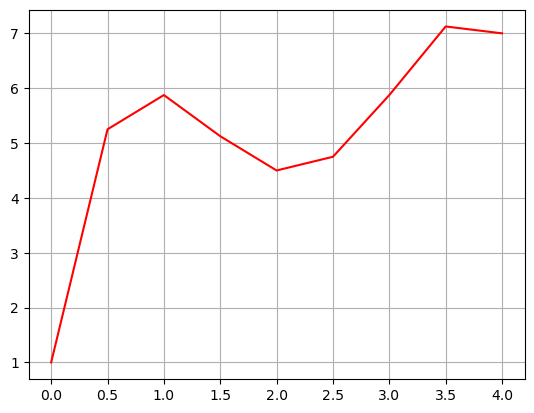

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.5 #passo
x0 = 0.0
xn = 4.0

# criamos a lista com os pontos xi
X = np.arange(x0, xn+h, h) 
print ("pontos xi:", X)

# lista com y0, a ser preenchida pelos yi
Y = [1.0]                  

# entramos com f(x,y)
f = lambda x: -2*x**3 + 12*x**2 - 20*x + 8.5

# laço para ir calculando os yi e preenchendo a lista
for x in X[0:-1]:
    Y.append(Y[-1] + f(x)*h ) #Y[-1] é o último yi calculado
    
# imprime
print ("pontos yi:", Y)

# plota
plt.plot(X, Y, "r-")
plt.grid()
plt.show()

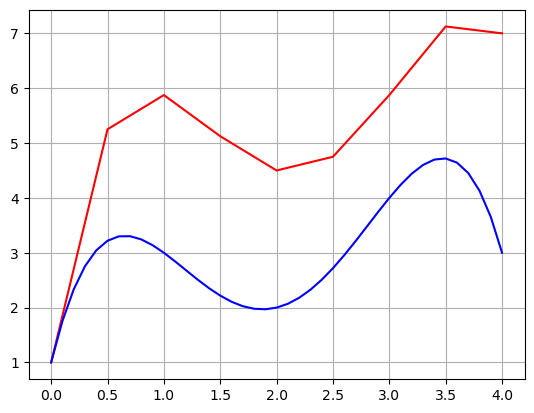

In [7]:
# plotando a solução exata para comparar
Xex = np.arange(0, 4.1, 0.1)

Yex = []
sol_ex = lambda x: -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1.0

for x in Xex:
    Yex.append(sol_ex(x))

plt.plot(X, Y, "r-", Xex, Yex, "b-")
plt.grid()
plt.show()

Nesse exemplo usamos um polinômio simples para a equação diferencial para facilitar a análise de erro a seguir. Logo,

$$\frac{dy}{dx} = f(x)$$

Um caso mais geral envolveria EDOs que dependam de $x$ e $y$, 

$$\frac{dy}{dx} = f(x,y)$$

Conforme progredirmos por esta parte do texto, nossos exemplos vão envolver cada vez mais EDOs que dependem tanto das variáveis dependentes quanto das independentes.

**Exemplo 2:** Use o método de Euler para integrar numericamente a equação:

$$ \frac{dy}{dx} = x-y+2$$

de $x = 0$ a $x = 1$ com um tamanho de passo de $0.25$. A condição inicial em $x = 0$ é $y = 2$. 

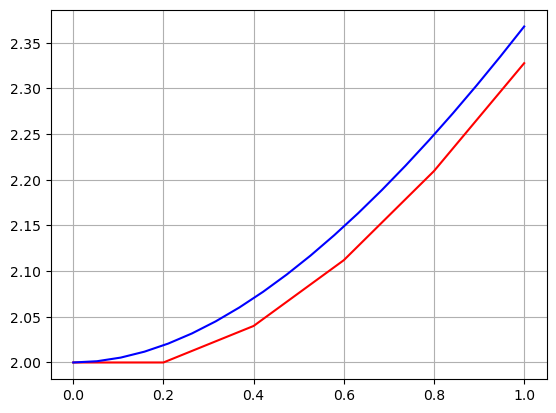

In [8]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.20; x0 = 0.0; xn = 1.0

X = np.arange(x0, xn+h, h); Y = [2.0]                  

f = lambda x,y: x-y+2

for n in range(len(X)-1):
    Y.append(Y[n] + f(X[n],Y[n])*h ) #Y[-1] é o último yi calculado
    
s = lambda x: np.exp(-x) + x + 1
Xe = np.linspace(x0,xn, 20)
Ye = s(Xe)

# plota
plt.plot(X, Y, "r-", Xe, Ye, "b-")
plt.grid()
plt.show()

**Exemplo 3:** Vamos obter a solução da equação $y' + y = \cos(t)$ com a condição inicial $y(0) = 1$ e plotar solução juntamente com o campo de direções.

### Exercícios

**1.** Resolva o seguinte problema de valor inicial no intervalo de $t=0$ a $2$ em que $y(0)=1$ analiticamente e numericamente, usando o método de Euler ($h=0,5$ e $0,25$) e plote as soluções.
$$
\frac{d y}{d t}=y t^2-1,1 y
$$


**2.** Resolva o seguinte problema de valor inicial no intervalo de $t=0$ a $1$ em que $y(0)=1$ analiticamente e numericamente, usando o método de Euler ($h=0,5$ e $0,25$) e plote as soluções.

$$
\frac{d y}{d t}=(1+4 t) \sqrt{y}
$$

**3.** Usando o método de Euler, determine uma solução aproximada para o PVI dado por

$$ \begin{cases} 
y'= -3y+6x+5 \\ 
y(0)=3   
\end{cases}$$

com $x \in [0,1]$ e $N=10$. Compare com a solução exata $y(x)=2e^{-3x}+2x+1$.

**4.** 
Dados o PVI abaixo e a sua solução exata, use dois métodos diferentes para estimar $u(t)$ com o passo sugerido, plote e comente os resultados.

$$ \begin{cases} 
u'= t^2(5-u)\\ 
0 \leq t \leq 2 \\
u(0)=0
\end{cases}$$

Solução exata: $u(t)=5-5e^{-t^3/3}$. Use passo $h=0,25$ e também $h=0,1$.


**5.** Use o método de Euler para obter uma aproximação para as soluções de cada um dos seguintes problemas de valor inicial.

a. $y^{\prime}=t e^{3 t}-2 y, \quad 0 \leq t \leq 1, \quad y(0)=0, \quad$ com $h=0,5$

b. $y^{\prime}=1+(t-y)^2, \quad 2 \leq t \leq 3, \quad y(2)=1, \quad \operatorname{com} h=0,5$

c. $y^{\prime}=1+y / t, \quad 1 \leq t \leq 2, \quad y(1)=2, \quad \operatorname{com} h=0,25$

d. $y^{\prime}=\cos 2 t+\operatorname{sen} 3 t, \quad 0 \leq t \leq 1, \quad y(0)=1, \quad \operatorname{com} h=0,25$

**6.** Use o método de Euler para obter uma aproximação para as soluções de cada um dos seguintes problemas de valor inicial.

a. $y^{\prime}=e^{t-y}, \quad 0 \leq t \leq 1, \quad y(0)=1, \quad \operatorname{com} h=0,5$

b. $y^{\prime}=\frac{1+t}{1+y}, \quad 1 \leq t \leq 2, \quad y(1)=2, \quad \operatorname{com} h=0,5$

c. $y^{\prime}=-y+t y^{1 / 2}, \quad 2 \leq t \leq 3, \quad y(2)=2, \quad$ com $h=0,25$

d. $y^{\prime}=t^{-2}(\operatorname{sen} 2 t-2 t y), \quad 1 \leq t \leq 2, \quad y(1)=2, \quad \operatorname{com} h=0,25$

**Referências**

ARENALES, Selma; DAREZZO, Artur. Cálculo Numérico: aprendizagem com Apoio de Software. Porto Alegre: Cengage Learning Brasil, 2016. E-book. ISBN 9788522112821. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788522112821/. Acesso em: 09 abr. 2024.

BOYCE, William E. Equações Diferenciais Elementares e Problemas de Valores de Contorno. Barueri: Grupo GEN, 2020. E-book. ISBN 9788521637134. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637134/. Acesso em: 19 mar. 2023.

BURDEN, Richard L.; FAIRES, J D.; BURDEN, Annette M. Análise Numérica - Tradução da 10ª edição norte-americana. 3. ed. Porto Alegre: +A Educação - Cengage Learning Brasil, 2016. E-book. p.298. ISBN 9788522123414. Disponível em: https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/. Acesso em: 06 mai. 2025.

CHAPRA, Steven C.; CANALE, Raymond P. Métodos numéricos para engenharia. Porto Alegre: Grupo A, 2016. E-book. ISBN 9788580555691. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788580555691/. Acesso em: 09 abr. 2024.